In [1]:
import sys

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('../src/')

from data_ingest import DataIngest

In [2]:
di = DataIngest()
df = di.load_data()

2022-12-19 19:10.47 [info     ] /home/matheus/Documents/repos/customers_intention_purchasing/src/../data/raw
2022-12-19 19:10.47 [info     ] Starting loading data...
2022-12-19 19:10.47 [info     ] Success loading data...


In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# 0.1. Split data

In [4]:
df['to_split'] = df.Month.str.cat(df['Revenue'].astype(str), sep='_')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,to_split
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,Feb_False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,Feb_False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,Feb_False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,Feb_False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,Feb_False


In [5]:
df.SpecialDay.value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

In [6]:
X_train, X_test = train_test_split(df, test_size=0.3, random_state=42, stratify=df[['to_split']])

## 0.1.1. Verify dimensions

In [18]:
X_train.Month.value_counts()

May     2355
Nov     2099
Mar     1335
Dec     1209
Oct      385
Sep      313
Aug      303
Jul      302
June     201
Feb      129
Name: Month, dtype: int64

In [24]:
X_train.Revenue.value_counts(normalize=True)

False    0.845325
True     0.154675
Name: Revenue, dtype: float64

In [19]:
X_test.Month.value_counts()

May     1009
Nov      899
Mar      572
Dec      518
Oct      164
Sep      135
Aug      130
Jul      130
June      87
Feb       55
Name: Month, dtype: int64

In [23]:
X_test.Revenue.value_counts(normalize=True)

False    0.845093
True     0.154907
Name: Revenue, dtype: float64

In [20]:
X_train.to_csv('../data/processed/train.csv', index=False)
X_test.to_csv('../data/processed/test.csv', index=False)

# 1.0. Exploratory data analysis

## 1.1. Univariate analysis

In [25]:
X_train.Revenue.value_counts(normalize=True)

False    0.845325
True     0.154675
Name: Revenue, dtype: float64

Como foi descrito na seção anterior (0-know-data), os dados da variável alvo estão desbalanceados, necessitando alguma atuação para a escolha do algoritmo, tomando cuidado para não excluir a questão da naturalidade do cenário possível de encontrar dados desbalanceados no modelo em produção.

<AxesSubplot: xlabel='Month', ylabel='count'>

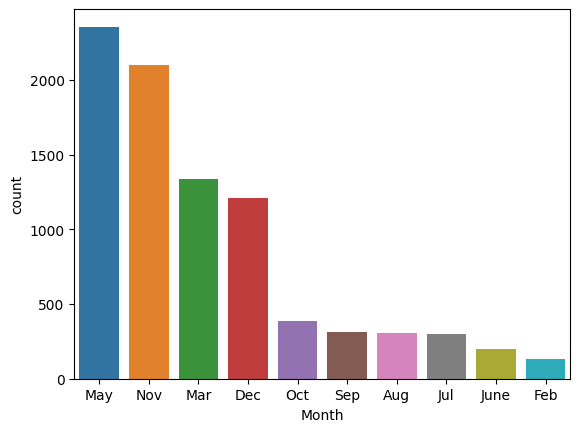

In [7]:
sns.countplot(x=X_train['Month'], order=X_train['Month'].value_counts('Month').index)

As vendas estão dessa empresa se concentra no mês de Maio como sendo o mês com maior quantidade de sessões de usuários, representando 27% do total. Uma hipótese levantada é que nesse mês possui mais datas importantes de feriado no país do que outros meses elevando assim as sessões no site.

<AxesSubplot: xlabel='OperatingSystems', ylabel='count'>

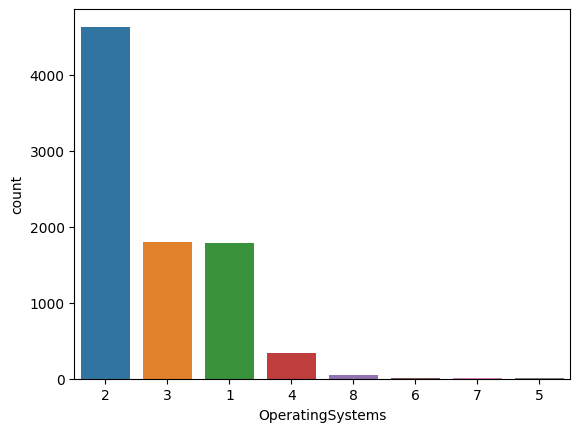

In [36]:
sns.countplot(x=X_train['OperatingSystems'], order=X_train['OperatingSystems'].value_counts('OperatingSystems').index)

As sessões dos usuários estão concentrados no sistema operacional 2, com isso podemos levar em conta que mais da metade (~53%) dos usuários utiliza esse sistema. Isso é importante saber pois o futuro modelo levará em conta essa dimensionalidade para o aprendizado.

<AxesSubplot: xlabel='Browser', ylabel='count'>

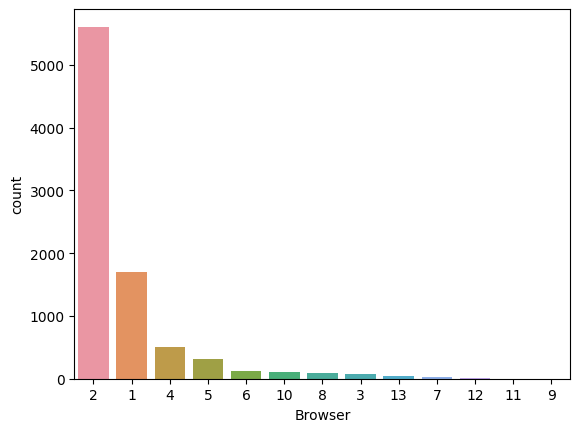

In [37]:
sns.countplot(x=X_train['Browser'], order=X_train['Browser'].value_counts('Browser').index)

A grande maioria dos usuários que acessam o sites utiliza o browser 2 (~65%) e em segundo lugar o 1 com aproximadamente 19%, juntos eles representam ~84% do total de acessos, o restante representam abaixo de ~5%.

<AxesSubplot: xlabel='Region', ylabel='count'>

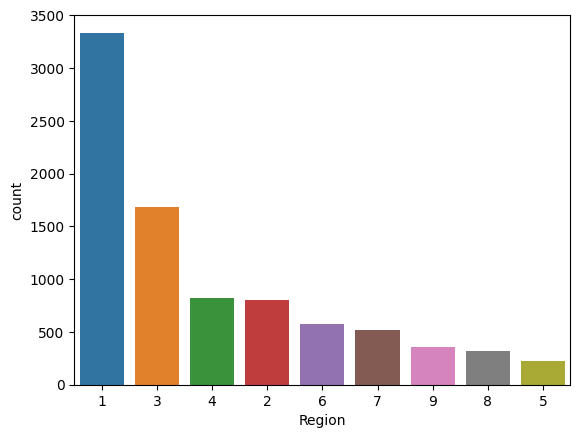

In [38]:
sns.countplot(x=X_train['Region'], order=X_train['Region'].value_counts('Region').index)

O foco dos acessos no site são da região 1, representando ~38%.

<AxesSubplot: xlabel='TrafficType', ylabel='count'>

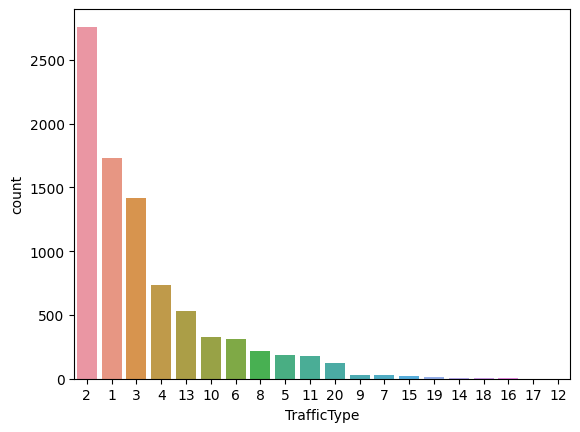

In [39]:
sns.countplot(x=X_train['TrafficType'], order=X_train['TrafficType'].value_counts('TrafficType').index)

Existem 20 diferentes tipos de tráfego dos acessos dos usuário, é bem possível que de um pode ser ramificação de outros elevando a quantidade de tráfego, como não temos a descrição de cada essa é a hipóteses de haver tantos valores distintos, sendo assim temos que o tráfego 2 soma quase ~31% dos acessos do site.

<AxesSubplot: xlabel='VisitorType', ylabel='count'>

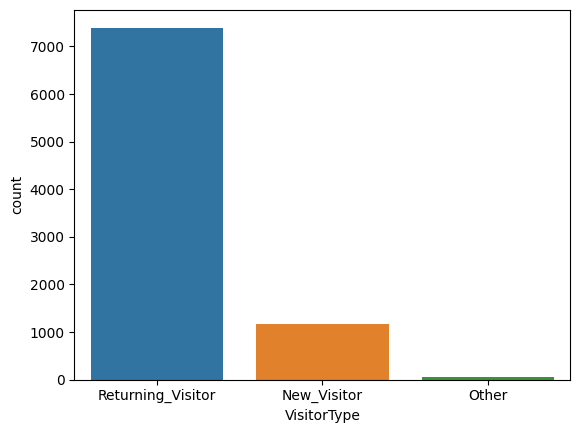

In [40]:
sns.countplot(x=X_train['VisitorType'], order=X_train['VisitorType'].value_counts('VisitorType').index)

Os acessos do site são originados de visitantes que retornam, que somam quase ~85% e formando uma grande maioria.

<AxesSubplot: xlabel='SpecialDay', ylabel='count'>

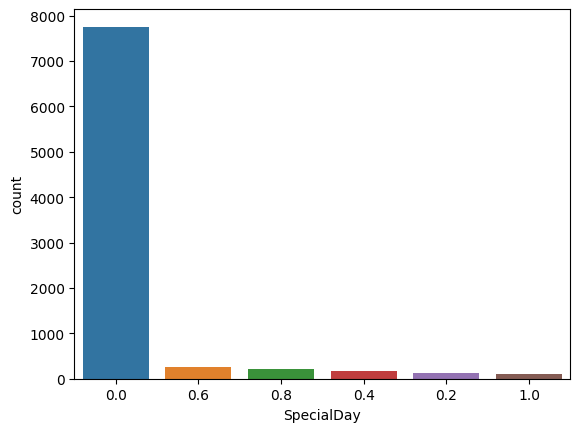

In [50]:
sns.countplot(x=X_train['SpecialDay'], order=X_train['SpecialDay'].value_counts('SpecialDay').index)

Os acessos ao site estão altamente concentrados em acessos em data de navegação para dias ou feriados especiais.

## 1.2. Bivariate analysis

- ProductRelated -> Revenue
- ProductRelated_Duration -> Revenue
- BounceRates -> Revenue
- ExitRates -> Revenue
- PageValues -> Revenue
- BounceRates -> TrafficTypes

...

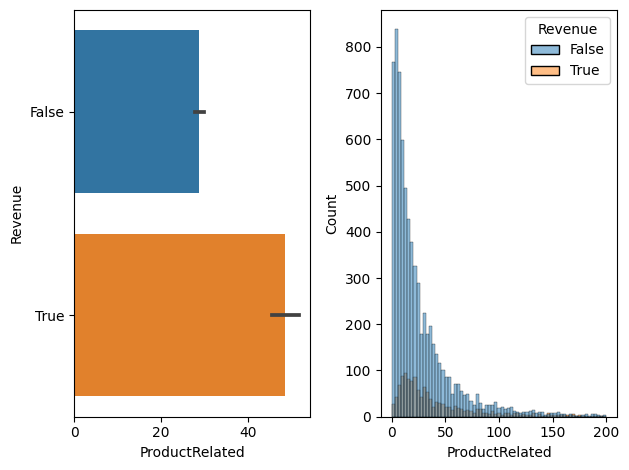

In [33]:
plt.subplot(1, 2, 1)
sns.barplot(data=X_train, x=X_train['ProductRelated'], y=X_train['Revenue'].astype(str))

plt.subplot(1, 2, 2)
sns.histplot(data=X_train.loc[X_train['ProductRelated']<=200], x='ProductRelated', hue='Revenue')

plt.tight_layout()

Usuários que tiveram a compra realizada acessam mais páginas de produto do que os que não compraram e a distribuição segue uma não normal.

<AxesSubplot: xlabel='ProductRelated_Duration', ylabel='Revenue'>

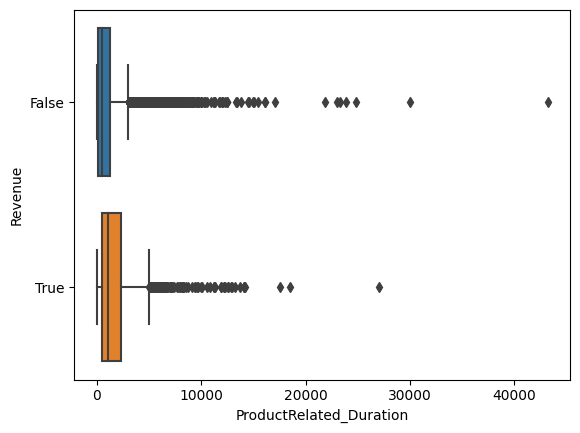

In [100]:
sns.boxplot(x=X_train['ProductRelated_Duration'], y=X_train['Revenue'].astype(str))

Usuários que realizaram a compra tendem a passar mais tempo numa página relacionada a um produto do que usuários sem compra, nesse último grupo, podemos perceber a presença de outliers.

<AxesSubplot: xlabel='BounceRates', ylabel='Revenue'>

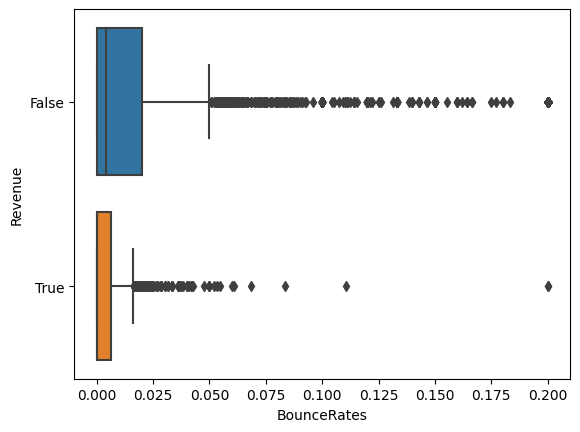

In [103]:
sns.boxplot(x=X_train['BounceRates'], y=X_train['Revenue'].astype(str))

Usuários que tiveram a compra realizada possuem taxas de bounce menores do que usuários sem compra, tornando um fator determinante em definição de uma inteção de compra.

<AxesSubplot: xlabel='ExitRates', ylabel='Revenue'>

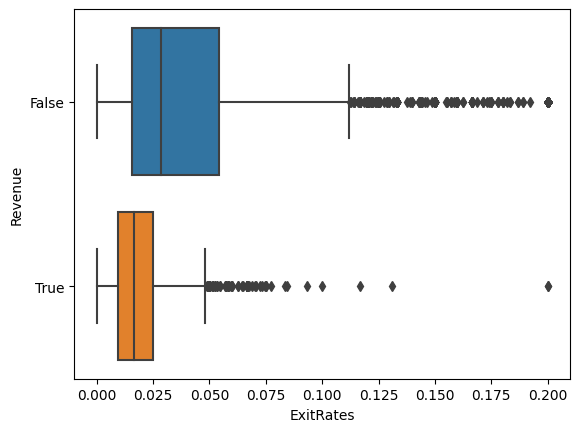

In [105]:
sns.boxplot(x=X_train['ExitRates'], y=X_train['Revenue'].astype(str))

Usuários com compra realizada possuem uma taxa de saída menor do que usuários sem compra, e esse último tem a presença de outliers.

<AxesSubplot: xlabel='PageValues', ylabel='Revenue'>

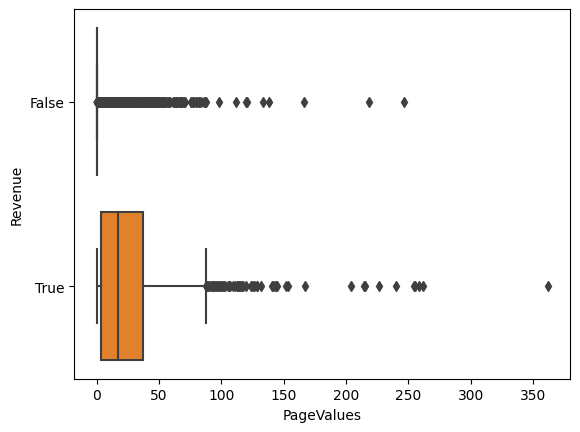

In [109]:
sns.boxplot(x=X_train['PageValues'], y=X_train['Revenue'].astype(str))

As sessões de usuários com compra realizadas são mais propensas a ter um valor de página maior do que aqueles que não tiveram.

## 1.3. Multivariate analysis

- Region + PageValues + Revenue
- TrafficType + BounceRates + Revenue
- VisitorType + ExitRates + Revenue

<AxesSubplot: xlabel='Region', ylabel='PageValues'>

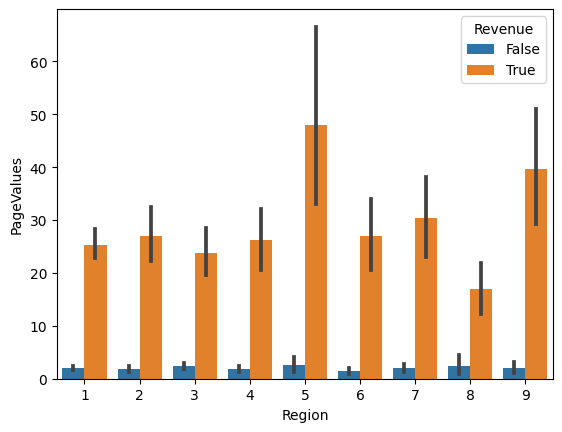

In [13]:
sns.barplot(x='Region', y='PageValues', hue='Revenue', data=X_train)

Quando olhamos a Region x PageValues identificamos que quando há uma compra existente o valor da página é exponencialmente maior que uando não existe a conclusão da compra. Além disso também podemos visualizar a presença de outliers para essa variável.

```Auxilio: Valor da página é o valor médio de uma página que um usuário visitou antes de ir à página da meta ou de concluir uma transação de comércio eletrônico (ou os dois). A finalidade desse valor é dar uma ideia de qual página do seu site contribuiu mais para a receita dele. Se a página não fez parte de nenhuma transação de comércio eletrônico do seu site, o valor dela será de R$ 0,00, já que ela não foi acessada em uma sessão em que ocorreu uma transação.```

<AxesSubplot: xlabel='TrafficType', ylabel='BounceRates'>

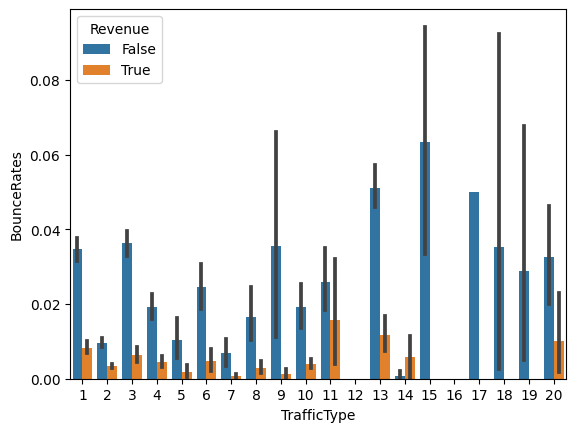

In [21]:
sns.barplot(x='TrafficType', y='BounceRates', hue='Revenue', data=X_train)

Como pode-se visualizar acima, usuários relacionados aos trafégos: 15, 16, 17, 18 e 19 são usuários que tendem a entrar no site e logo sair e também usuários que realizaram a compra originados do trafégo 14 são usuários que tem uma taxa de bounce maior do que usuários que não tiveram a compra.

<AxesSubplot: xlabel='VisitorType', ylabel='ExitRates'>

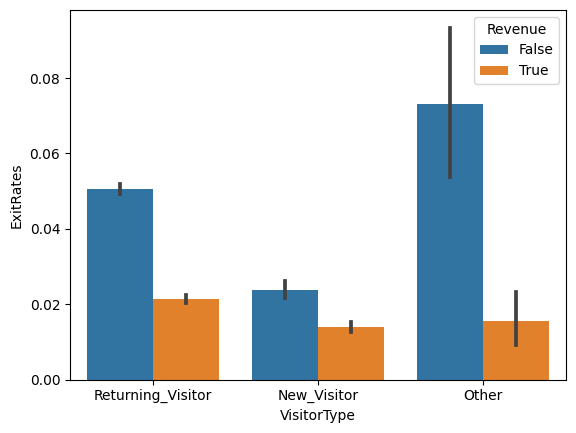

In [25]:
sns.barplot(x='VisitorType', y='ExitRates', hue='Revenue', data=X_train)

Na visualização acima podemos extrair que usuários que são retornantes ao site e não compraram tiveram taxa de saída maior que os mesmo tipo de usuário porém realizaram a compra, o mesmo pode-se falar sobre usuário novos no site.